# Human Activity Recognition


# The Dataset:
Data collected from 30 subjects (persons of ages 19-48 yrs). 
All performing 1 of 6 activities:
1. Walking
2. Walking upstairs
3. Walking downstairs
4. Sitting
5. Standing
6. Laying

Movement Data:
x,y,z accelerometer data(linear acceleration)
x,y,z gyroscopic data(angular velocity)
Recorded at 50 Hz -> Meaning measurment recorded 50 times a second
Each subject performed the protocol (a sequence of activities given to them) twice - with different placement of phone on their body

Pre-processing:
Getting rid of noise from accelrometer and gyroscopic data -> using filters (low-pass)
Splitting data into fixed windows of 2.56 seconds (128 data points) - with 50% overlap (???)

Feature Engineering: (need more domain knowledge to do this ourselves. Has already been done)
some time and frequency features commonly used in the field of human activity recognition were extracted from each window. 
Result -> 561-element vector of features. (this means the X data matrix will have 561 columns)

'Inertial Signals'
9 files
3 each for x,y,z of gravitational acceleration - 'total_acc_x,y,z_train.txt'
3 each for x,y,z of body acceleration - 'body_acc_x,y,z_train.txt'
3 each for x,y,z of gyro - 'body_gyro_x,y,z_train.txt'




# Load Data

In the read_csv call we specify that the file we are loading has no header and that the columns in it are separated by whitespace (hence delim_whitespace=True)

In [1]:
from pandas import read_csv

#function to load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

data = load_file('HARDataset/train/Inertial_Signals/total_acc_y_train.txt')
print(data.shape)

(7352, 128)


In [2]:
type(data)

numpy.ndarray

In [3]:
dataframe = read_csv('HARDataset/train/Inertial_Signals/total_acc_y_train.txt')
type(dataframe)

pandas.core.frame.DataFrame

Lists vs Numpy Arrays vs Dataframes ?
https://www.quora.com/What-is-the-difference-between-a-data-frame-and-a-NumPy-array-in-Python
Dataframes are essentially tabular data structures where each row can be a different type (?), i think...

Load a group of files: for e.g. all of the total acceleration datafiles. Right now, we have only loaded the y part of the training data's total acceleration values. We need to load the x and z too. 
Then, we need to load the x,y, and z components of the body acceleration - these files are 'body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt' 
Finally, we need to load the x,y,z components of gyroscopic data - these files are 'body_gyro_x_train.txt', 'body_gyro_y_train.txt', and 'body_gyro_z_train.txt'
All these files are located in HARDataset/train/Inertial_Signals. These are the 9 files we mentioned earlier. 

So, we basically have 3 groups - total_acc, body_acc, and body_gyro
We can use the group in the function that is defined below

dstack() function from numpy is used below to ensure that each array is stacked in such a way that features are separated in the third dimension (???)

In [4]:
from numpy import dstack
#load a list of files, such as x,y,z data for a given variable
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix+name)
        loaded.append(data)
    #stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='HARDataset/train/Inertial_Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [5]:
#load a dataset group such as test or train
def load_dataset(group, prefix=''):
    filepath = prefix + group + '/Inertial_Signals/'
    #load all 9 files as a single array
    filenames = list()
    #total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    #body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    #body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    #load input data
    X = load_group(filenames, filepath)
    #load class output
    y = load_file(prefix+group+'/y_'+group+'.txt')
    return X,y

trainX, trainy = load_dataset('train', 'HARDataset/')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset('test', 'HARDataset/')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


# Balance of Activity Classes
How many instances corresponding to each of the 6 classes. Should be balanced well. Otherwise the data may end up getting trained better for some classes than other and will not be able to classify instances of some classes as well as others. 


In [6]:
from numpy import array
from numpy import vstack
from pandas import DataFrame
#summarize the balance of classes in an output variable column
def class_breakdown(data):
    #convert the numpy array into a dataframe
    df = DataFrame(data)
    #group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    #retrieve raw rows
    counts = counts.values
    #summarize
    for i in range(len(counts)):
        percent = counts[i]/len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))


#load train file
trainy = load_file('HARDataset/train/y_train.txt')
#summarize class breakdown
print('Train Dataset')
class_breakdown(trainy)

#load test file
testy = load_file('HARDataset/test/y_test.txt')
#summarize class breakdown
print('Test Dataset')
class_breakdown(testy)

#summarize combined class breakdown
print('Both')
combined = vstack((trainy,testy))
class_breakdown(combined)


    

Train Dataset
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Test Dataset
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


Load the subject_train.txt that provides a mapping of rows to the subject to which it belongs. 
Use the NumPy function unique() to retrieve a list of the unique subjects in the training dataset. 

In [7]:
sub_map = load_file('HARDataset/train/subject_train.txt')
from numpy import unique
train_subjects = unique(sub_map)
print(train_subjects)

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


Now we need a way to retrieve all the rows belonging to a single subject. Do this by finding all of the row numbers that belong to a given subject and use those row numbers to select data from the loaded X and y data. 

In [8]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    #get row indexes for subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i] == sub_id]
    #return the selected samples
    return X[ix, :, :], y[ix]
    

In [9]:
#convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        #remove the overlap from the window
        half = int(len(window)/2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

In [10]:
from matplotlib import pyplot

#plot the data for one subject
def plot_subject(X,y):
    pyplot.figure()
    #determine the total number of plots
    n, off = X.shape[2] + 1, 0
    #plot total acc
    for i in range(3):
        pyplot.subplot(n,1,off+1)
        pyplot.plot(to_series(X[:,:,off]))
        pyplot.title('total acc'+str(i), y=0, loc='left')
        off += 1
    #plot body acc
    for i in range(3):
        pyplot.subplot(n,1,off+1)
        pyplot.plot(to_series(X[:,:,off]))
        pyplot.title('body acc'+str(i), y=0, loc='left')
        off += 1
    #plot body gyro
    for i in range(3):
        pyplot.subplot(n,1,off+1)
        pyplot.plot(to_series(X[:,:,off]))
        pyplot.title('body gyro'+str(i), y=0, loc='left')
        off += 1
    #plot activities
    pyplot.subplot(n,1,n)
    pyplot.plot(y)
    pyplot.title('activity', y=0, loc='left')
    pyplot.show()

(347, 128, 9) (347, 1)


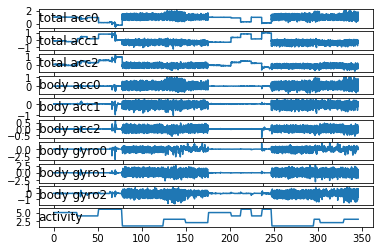

In [11]:
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
#plot data for subject
plot_subject(subX,suby)

The plot above shows the values of all 9 variables for a particular subject. The activities (1-6) carried out by that subject are shown in the last(bottom-most) plot. Therefore to see the resepctive total acceleration, body acceleration, or gyroscope value, we can just look up from the activity plot. They all share the x axis plot which is the time axis. 
We can also plot the same for a different subject with a little tweaking. 

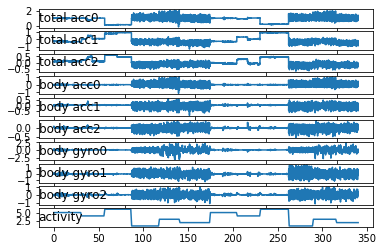

In [12]:
sub_id = train_subjects[1]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
plot_subject(subX, suby)

The problem that we are trying to address here is that given a bunch of data for a subject, we have to predict the activity being performed. This suggests that there must be regularity in movement data across subjects (WHY???). To check and confirm this, we can plot and compare historgrams of movement data across 10 subjects. A plot is created for each subject and three variables (x,y,z) for one data tyoe (total_acc, body_acc, body_gyro). 
The function below does this. It takes as arguments the loaded dataset, the mapping of rows to subjects, and number of subjects to plot. 

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


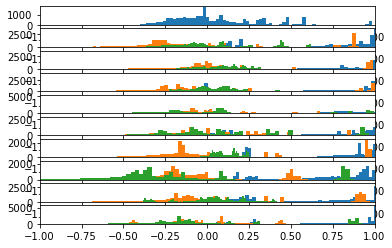

In [15]:
#plot historgrams for multiple subjects
def plot_subject_histograms(X, y, sub_map, n=10):
    pyplot.figure()
    #get unique subjects
    subject_ids = unique(sub_map[:,0])
    #enumerate subjects
    xaxis = None
    for k in range(n):
        sub_id = subject_ids[k]
        #get data for one subject
        subX, _ = data_for_subject(X,y,sub_map, sub_id)
        #total acc
        for i in range(3):
            ax = pyplot.subplot(n,1,k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k==0:
                xaxis = ax
            pyplot.hist(to_series(subX[:,:,i]), bins=100)
    pyplot.show()
    
X,y = load_dataset('train', 'HARDataset/')
sub_map = load_file('HARDataset/train/subject_train.txt')
plot_subject_histograms(X,y,sub_map)
    

Below the same is done for body_acc variable

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


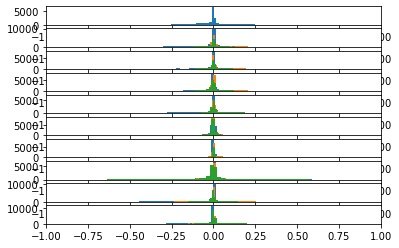

In [18]:
def plot_subject_histograms_one(X, y, sub_map, n=10):
    pyplot.figure()
    #get unique subjects
    subject_ids = unique(sub_map[:,0])
    #enumerate subjects
    xaxis = None
    for k in range(n):
        sub_id = subject_ids[k]
        #get data for one subject
        subX, _ = data_for_subject(X,y,sub_map, sub_id)
        #total acc
        for i in range(3):
            ax = pyplot.subplot(n,1,k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k==0:
                xaxis = ax
            pyplot.hist(to_series(subX[:,:,3+i]), bins=100)
    pyplot.show()

plot_subject_histograms_one(X,y,sub_map)

And then for body_gyro. 

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


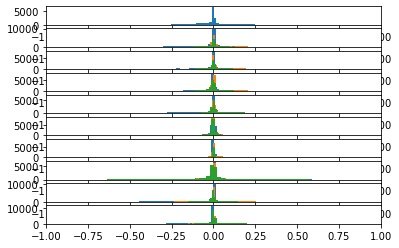

In [19]:
def plot_subject_histograms_two(X, y, sub_map, n=10):
    pyplot.figure()
    #get unique subjects
    subject_ids = unique(sub_map[:,0])
    #enumerate subjects
    xaxis = None
    for k in range(n):
        sub_id = subject_ids[k]
        #get data for one subject
        subX, _ = data_for_subject(X,y,sub_map, sub_id)
        #total acc
        for i in range(3):
            ax = pyplot.subplot(n,1,k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k==0:
                xaxis = ax
            pyplot.hist(to_series(subX[:,:,3+i]), bins=100)
    pyplot.show()

plot_subject_histograms_two(X,y,sub_map)

# Discriminating between activities

Since we are interested in determining activity based on activity data, it would be beneficial to us to investigate each activity per subject. Therefore, we can try to plot the histograms for each activity for a particular subject. 
The three axis of a given data point would be on each plot. 
The data_by_activity() function will group the rows of each subject based on the activity. 

In [ ]:
def data_by_activity(X, y, activities):
    # group windows by activity
    return {a:X[y[:,0]==a,:,:] for a in activities}